In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print('no. of images = ', mnist.train.images.shape[0]) 
print('size of each images (pixels) = ', mnist.train.images.shape[1]) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


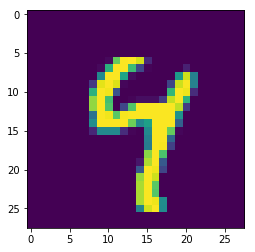

In [4]:
#Import matplotlib
import matplotlib.pyplot as plt

sample_label = mnist.train.labels[2]
print(sample_label)

sample_image = mnist.train.images[2].reshape(28, 28)
plt.imshow(sample_image)
plt.show()

Parameter values are empirical adjusted values for each data set. You can experiment with different values to achieve the best results. We have the following basic parameters & hyperparameters:

    learning_rate = 0.001 # How quickly to adjust the cost function.
    training_epochs = 15 # How many training cycles to go through.
    batch_size = 1000 # Size of the ‘batches’ of training data
    n_hidden_1 = 256 # Neuron in 1st layer
    n_hidden_2 = 256 # Neuron in 2nd layer
    n_input = 784 # Number of pixels in one image (28X28)
    n_classes = 10 # Total number of classes from 0 to 10
    n_sample = mnist.train.num_examples

In [5]:
learning_rate = 0.001 # How quickly to adjust the cost function.
training_epochs = 15 # How many training cycles to go through.
batch_size = 1000 # Size of the ‘batches’ of training data
n_hidden_1 = 256 # Neuron in 1st layer
n_hidden_2 = 256 # Neuron in 2nd layer
n_input = 784 # Number of pixels in one image (28X28)
n_classes = 10 # Total number of classes from 0 to 10
n_sample = mnist.train.num_examples

In [6]:
# tf Graph input (Define two empty containers, 1- input & 2- output)
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

For the sake of simplicity, we will create only model with two hidden layers:

Step 1: We will receive input data array to the first hidden layer (with 256 neurons in this case). The data will have random weight attached to it between layers and then sent to a node to undergo an activation function (along with a Bias). In this example, we will be using the RELU activation function which is a very simple rectifier fucntion that returns x or zero. For our final output layer, we will use a linear activation with matrix multiplication.

Step 2: The output of first layer will be input to the next hidden layer where the same process will be repeated with different weights and bias.

Step 3: The final output data will be evaluated using a loss function (or cost function) which tells us how far off we are from the desired result.

Step 4: Apply an optimisation function to minimise the cost. We will use the Adam Optimiser in this example. We can adjust how quickly we want to apply this optimisation by tweaking the learning rate parameter above. The lower the rate, the higher the possibility for accurate training results.

In [7]:
def multilayer_perceptron(x, weights, biases):
	"""
	x: palceholder for data inputs
	weights: Dictionary of weights
	biases: Dictionary of biases
	"""

	#First hidden layer with ReLu (Rectified Linear Unit) activation (256 neuron)
	layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
	layer_1 = tf.nn.relu(layer_1)

	#Second hidden layer with ReLu activation (256 neuron)
	layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
	layer_2 = tf.nn.relu(layer_2)

	#Final Output layer with linear activation (neuron for each class)
	out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

	return out_layer

#Construct the model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer (optimizer will help in reducing the cost)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
# Run Session
sess = tf.InteractiveSession()

# Initializing the variables
init = tf.global_variables_initializer()

sess.run(init)

# 2 loops only as we set training_epochs = 2
for epoch in range(training_epochs):
    #Start with cost
    avg_cost = 0.0
    
    #Convert total number of batches to integer
    total_batch = int(n_sample/batch_size)
    
    #Loop over all the batches
    for i in range(total_batch):
        
        #Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #Feed dictionary for optimization and loss value
        #Returns a tuple, but we only need 'c' the cost
        #We set an underscore as a throw away
        _, c = sess.run([optimizer, cost], feed_dict = {x:batch_x, y:batch_y})
        
        #Since 'c' above is for only for single batch so we have to compute average
        avg_cost += c / total_batch
        
        #Display logs per epoch step
    print("Epoch: {} cost={:.4f}".format(epoch + 1, avg_cost))

print("Model has completed {} Epoch of training".format(training_epochs))
print("Optimization Finished!")


Epoch: 1 cost=664.0362
Epoch: 2 cost=178.4355
Epoch: 3 cost=109.6021
Epoch: 4 cost=81.8151
Epoch: 5 cost=66.3303
Epoch: 6 cost=56.0368
Epoch: 7 cost=48.5834
Epoch: 8 cost=42.7741
Epoch: 9 cost=38.1617
Epoch: 10 cost=34.3432
Epoch: 11 cost=31.1136
Epoch: 12 cost=28.3497
Epoch: 13 cost=26.0664
Epoch: 14 cost=23.8468
Epoch: 15 cost=21.9714
Model has completed 15 Epoch of training
Optimization Finished!


In [9]:
# Test the model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# Use tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.
correct_predictions = tf.cast(correct_predictions,'float')

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))

# The accuracy is still a Tensor object. The eval() method allows you to directly evaluates this tensor in a Session
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9095
